In [1]:
# %pip install pyfolio

# Import modules

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import norm

# Import data (ESG stocks csv file)

In [3]:
df=pd.read_csv("./ESG Top 100 Stocks.csv")

# Quick glance of the data attributes and summary statistics

In [4]:
df.head()

,Rank,Company,Symbol,Industry,ESG Score,Comp Rtg,RS Rtg,EPS Rtg,SMR Rtg,3-Yr EPS Growth Rate,ROE,Last Qtr Sales % Chg,Last Qtr EPS % Chg,Div Yld
0,1,Microsoft,MSFT,Computer Software-Desktop,76.3,99,84,94,A,25%,47%,21%,49%,0.7
1,2,Linde,LIN,Chemicals-Specialty,76,94,66,85,B,16,9,19,42,1.3
2,3,Accenture,ACN,Computer-Tech Services,75.95,97,84,81,A,9,33,21,26,1
3,4,J.B. Hunt,JBHT,Transportation-Trucking,74.14,89,68,81,B,6,21,36,41,0.7
4,5,Xylem,XYL,Machinery-Tools & Resources,73.89,87,87,79,B,-8,13,16,65,0.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  100 non-null    int64 
 1   Company               100 non-null    object
 2   Symbol                100 non-null    object
 3   Industry              100 non-null    object
 4   ESG Score             100 non-null    object
 5   Comp Rtg              100 non-null    int64 
 6   RS Rtg                100 non-null    int64 
 7   EPS Rtg               100 non-null    int64 
 8   SMR Rtg               100 non-null    object
 9   3-Yr EPS Growth Rate  99 non-null     object
 10  ROE                   99 non-null     object
 11  Last Qtr Sales % Chg  99 non-null     object
 12  Last Qtr EPS % Chg    99 non-null     object
 13  Div Yld               99 non-null     object
dtypes: int64(4), object(10)
memory usage: 11.1+ KB


# 30 Stock Selection

In [6]:
#create dataframe of only stocks with SMR Rtg of A or B
df2=df[df["SMR Rtg"].isin(["A","B"])]

In [7]:
# tickers = df2["Symbol"]

# start_date = '2017-01-01'
# end_date = '2021-12-31'

# all_data = data.DataReader(tickers,'yahoo', start_date, end_date)
# all_stocks_price_df = all_data['Adj Close']

## Remove ESG stocks that are not valid anymore 

In [8]:
#https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df3 = df2.drop(df2[df2["Symbol"].isin(["INFO","BLL","XLNX"])].index, inplace=False)
df3.reset_index()
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  90 non-null     int64 
 1   Company               90 non-null     object
 2   Symbol                90 non-null     object
 3   Industry              90 non-null     object
 4   ESG Score             90 non-null     object
 5   Comp Rtg              90 non-null     int64 
 6   RS Rtg                90 non-null     int64 
 7   EPS Rtg               90 non-null     int64 
 8   SMR Rtg               90 non-null     object
 9   3-Yr EPS Growth Rate  89 non-null     object
 10  ROE                   89 non-null     object
 11  Last Qtr Sales % Chg  89 non-null     object
 12  Last Qtr EPS % Chg    89 non-null     object
 13  Div Yld               89 non-null     object
dtypes: int64(4), object(10)
memory usage: 10.5+ KB


,Rank,Company,Symbol,Industry,ESG Score,Comp Rtg,RS Rtg,EPS Rtg,SMR Rtg,3-Yr EPS Growth Rate,ROE,Last Qtr Sales % Chg,Last Qtr EPS % Chg,Div Yld
0,1,Microsoft,MSFT,Computer Software-Desktop,76.3,99,84,94,A,25%,47%,21%,49%,0.7
1,2,Linde,LIN,Chemicals-Specialty,76,94,66,85,B,16,9,19,42,1.3
2,3,Accenture,ACN,Computer-Tech Services,75.95,97,84,81,A,9,33,21,26,1
3,4,J.B. Hunt,JBHT,Transportation-Trucking,74.14,89,68,81,B,6,21,36,41,0.7
4,5,Xylem,XYL,Machinery-Tools & Resources,73.89,87,87,79,B,-8,13,16,65,0.8


In [9]:
#rand_30=np.random.choice(df3["Symbol"],30,replace=False)
# Below is the list of 30 stocks generated after running the random selection once
rand_30=['NTAP', 'ASGN', 'FTNT', 'AMAT', 'ARE', 'TXN', 'ZTS', 'ANET', 'IT',
       'JBHT', 'SUI', 'MAT', 'AMP', 'ROG', 'ETN', 'THRM', 'AMD', 'CR',
       'AMT', 'QCOM', 'FR', 'ALTR', 'FLEX', 'DAR', 'MSFT', 'HOLX', 'FIVE',
       'APAM', 'NOG', 'DHR']
df4=df3[df3["Symbol"].isin(rand_30)]
df4=df4.reset_index(drop=True)

# #checking for at least 10 unique industries in our selected 30 stocks 
# df4["Industry"].nunique()
df4[["Symbol","Company","Industry","SMR Rtg"]]

,Symbol,Company,Industry,SMR Rtg
0,MSFT,Microsoft,Computer Software-Desktop,A
1,JBHT,J.B. Hunt,Transportation-Trucking,B
2,TXN,Texas Instruments,Electronics-Semiconductor Mfg,A
3,ROG,Rogers,Electronics-Semiconductor Mfg,B
4,QCOM,Qualcomm,Electronics-Semiconductor Fabless Mfg,A
5,AMD,Advanced Micro Devices,Electronics-Semiconductor Fabless Mfg,A
6,APAM,Artisan Partners,Finance-Investment Management,A
7,ETN,Eaton,Diversified Operations,B
8,AMAT,Applied Materials,Electronics-Semiconductor Equipment,A
9,ASGN,ASGN,Commercial Services-Staffing,B


# Retrieve daily stock price for each of the 30 selected stocks 

In [10]:
tickers = df4["Symbol"]

start_date = '2017-01-01'
end_date = '2021-12-31'

all_data = data.DataReader(tickers,'yahoo', start_date, end_date)
all_stocks_price_df = all_data['Adj Close']

# Finding the Efficient Frontier using Monte Carlo Simulation

## The following codes are based on the python source code provided in the Python for Finance Cookbook

In [11]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
N_assets=len(df4["Symbol"])

In [12]:
all_pct_returns_df = all_stocks_price_df.pct_change().dropna()
all_avg_returns = all_pct_returns_df.mean() * 252
all_cov_mat = all_pct_returns_df.cov() * N_DAYS
# all_pct_returns_df.columns

In [13]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS,N_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [14]:
all_portf_rtns = np.dot(weights, all_avg_returns)

all_portf_vol = []
for i in range(0, len(weights)):
    all_portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                    np.dot(all_cov_mat, weights[i]))))
all_portf_vol = np.array(all_portf_vol)
    
all_portf_sharpe_ratio = all_portf_rtns / all_portf_vol

In [15]:
all_portf_results_df = pd.DataFrame({'returns': all_portf_rtns,
                                 'volatility': all_portf_vol,
                                 'sharpe_ratio': 
                                  all_portf_sharpe_ratio})

No handles with labels found to put in legend.


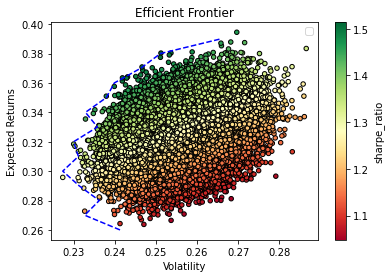

In [16]:
N_POINTS = 100
all_portf_vol_ef = []
indices_to_skip = []

all_portf_rtns_ef = np.linspace(all_portf_results_df.returns.min(), 
                            all_portf_results_df.returns.max(), 
                            N_POINTS)
all_portf_rtns_ef = np.round(all_portf_rtns_ef, 2) 
all_portf_rtns = np.round(all_portf_rtns, 2)

for point_index in range(N_POINTS):
    if all_portf_rtns_ef[point_index] not in all_portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(all_portf_rtns == 
                           all_portf_rtns_ef[point_index])
    all_portf_vol_ef.append(np.min(all_portf_vol[matched_ind]))
    

all_portf_rtns_ef = np.delete(all_portf_rtns_ef, indices_to_skip)

# MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()
all_portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.plot(all_portf_vol_ef, all_portf_rtns_ef, 'b--')
# for asset_index in range(N_assets):
#     ax.scatter(x=np.sqrt(all_cov_mat.iloc[asset_index, asset_index]), 
#                y=all_avg_returns[asset_index], 
#                marker=MARKS[asset_index], 
#                s=150, 
#                color='black',
#                label=df4["Symbol"][asset_index])
              
ax.legend()

## Locating portfolios with the highest Sharpe Ratio or the minimum Volatility

In [17]:
max_sharpe_ind = np.argmax(all_portf_results_df.sharpe_ratio)
max_sharpe_portf = all_portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(all_portf_results_df.volatility)
min_vol_portf = all_portf_results_df.loc[min_vol_ind]

In [18]:
print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(df4["Symbol"], weights[np.argmax(all_portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)
    
#Saving the weights generated from monte carlo simulation
mtc_highest_sharpe_weights=weights[np.argmax(all_portf_results_df.sharpe_ratio)]

Maximum Sharpe ratio portfolio ----
Performance
returns: 38.03% volatility: 25.12% sharpe_ratio: 151.37% 
Weights
MSFT: 6.54% JBHT: 0.10% TXN: 1.57% ROG: 2.04% QCOM: 4.84% AMD: 6.72% APAM: 0.35% ETN: 0.29% AMAT: 6.50% ASGN: 5.40% ALTR: 5.11% FTNT: 6.82% NTAP: 1.60% IT: 5.61% FIVE: 1.64% MAT: 1.70% NOG: 3.34% ARE: 4.49% CR: 1.84% ANET: 3.69% FR: 0.96% DHR: 6.54% DAR: 5.07% AMT: 6.89% SUI: 1.69% HOLX: 0.98% FLEX: 0.78% ZTS: 6.78% THRM: 0.13% AMP: 0.03% 

In [19]:
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(df4["Symbol"], weights[np.argmax(all_portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)
#Saving the weights generated from monte carlo simulation
mtc_lowest_vol_weights=weights[np.argmax(all_portf_results_df.volatility)]

Minimum Volatility portfolio ----
Performance
returns: 29.57% volatility: 22.74% sharpe_ratio: 130.06% 
Weights
MSFT: 1.30% JBHT: 1.10% TXN: 1.37% ROG: 7.24% QCOM: 6.58% AMD: 7.53% APAM: 3.20% ETN: 0.86% AMAT: 1.20% ASGN: 3.37% ALTR: 6.67% FTNT: 7.03% NTAP: 6.23% IT: 6.84% FIVE: 6.59% MAT: 0.11% NOG: 7.38% ARE: 1.37% CR: 0.29% ANET: 3.68% FR: 0.27% DHR: 2.05% DAR: 1.29% AMT: 2.23% SUI: 0.33% HOLX: 1.74% FLEX: 5.94% ZTS: 0.25% THRM: 0.51% AMP: 5.46% 

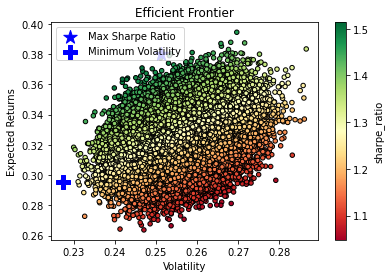

In [20]:
fig, ax = plt.subplots()
all_portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, 
           y=max_sharpe_portf.returns, 
           c='blue', marker='*', 
           s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, 
           y=min_vol_portf.returns, 
           c='blue', marker='P', 
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

# Analyse individual stocks according to metrics

## Looking at Kurtosis to infer the distribution of the stock prices for each stock

In [21]:
print("Kurtosis (ranked in descending order): \n",all_pct_returns_df.kurtosis().round(2).sort_values(ascending=False))

Kurtosis (ranked in descending order): 
 Symbols
FLEX    25.80
ETN     22.69
SUI     22.12
AMP     20.49
ARE     19.87
FR      19.30
IT      16.38
FIVE    14.87
HOLX    14.77
ROG     13.27
ANET    13.00
QCOM    12.62
AMT     12.48
ZTS     12.00
ASGN    10.88
FTNT    10.29
NTAP     9.86
MSFT     9.62
MAT      9.50
DAR      9.11
ALTR     8.64
CR       8.30
JBHT     7.82
NOG      7.09
APAM     6.76
DHR      5.70
THRM     5.32
TXN      5.25
AMAT     4.74
AMD      3.60
dtype: float64


# Looking at correlation, annualised returns, annualised volatility,sharpe ratio, beta  for each stock 

Strongly positively correlated:
 Symbols  Symbols
FR       ARE        0.801881
AMAT     TXN        0.772489
AMP      ETN        0.760932
CR       ETN        0.753232
SUI      FR         0.738711
dtype: float64 

Weak postiive correlation:
 Symbols  Symbols
NOG      ALTR       0.164510
SUI      NOG        0.151011
DHR      NOG        0.131455
ANET     NOG        0.129564
AMT      NOG        0.109183
dtype: float64


C:\Users\acer\AppData\Local\Temp/ipykernel_21288/4236563856.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(correlation.shape), k=1).astype(np.bool))


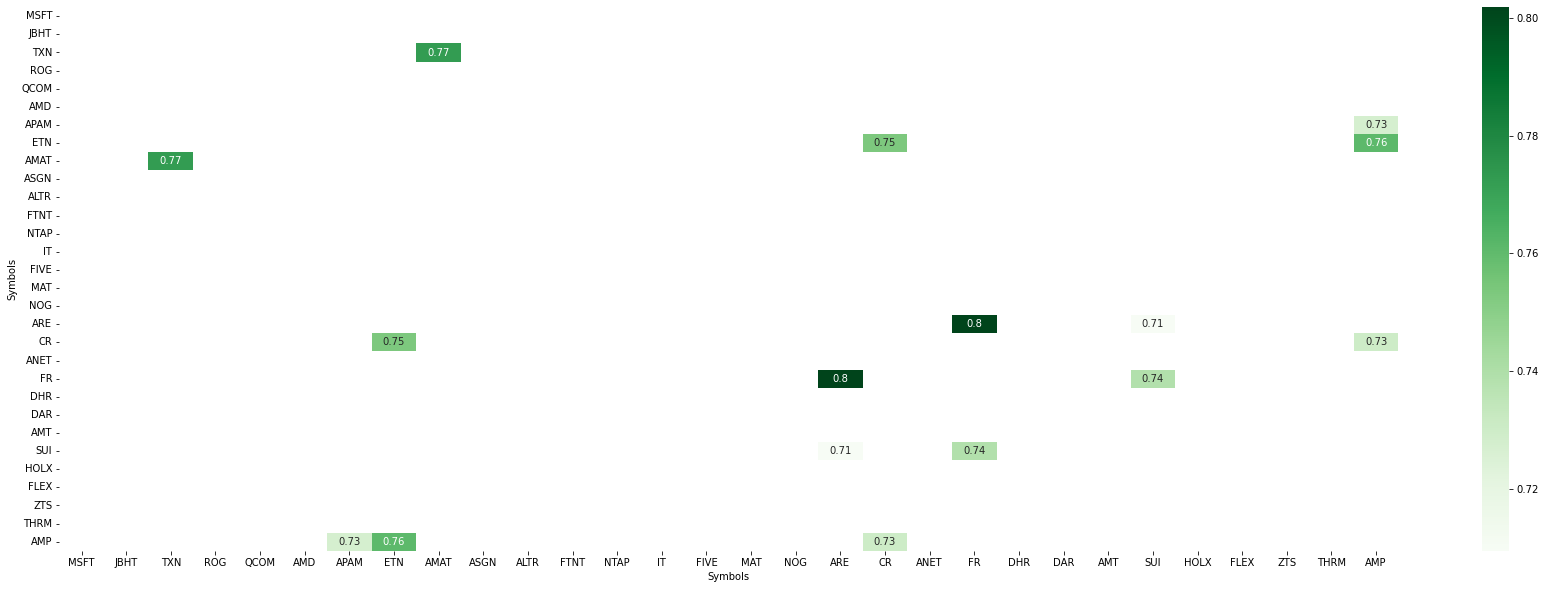

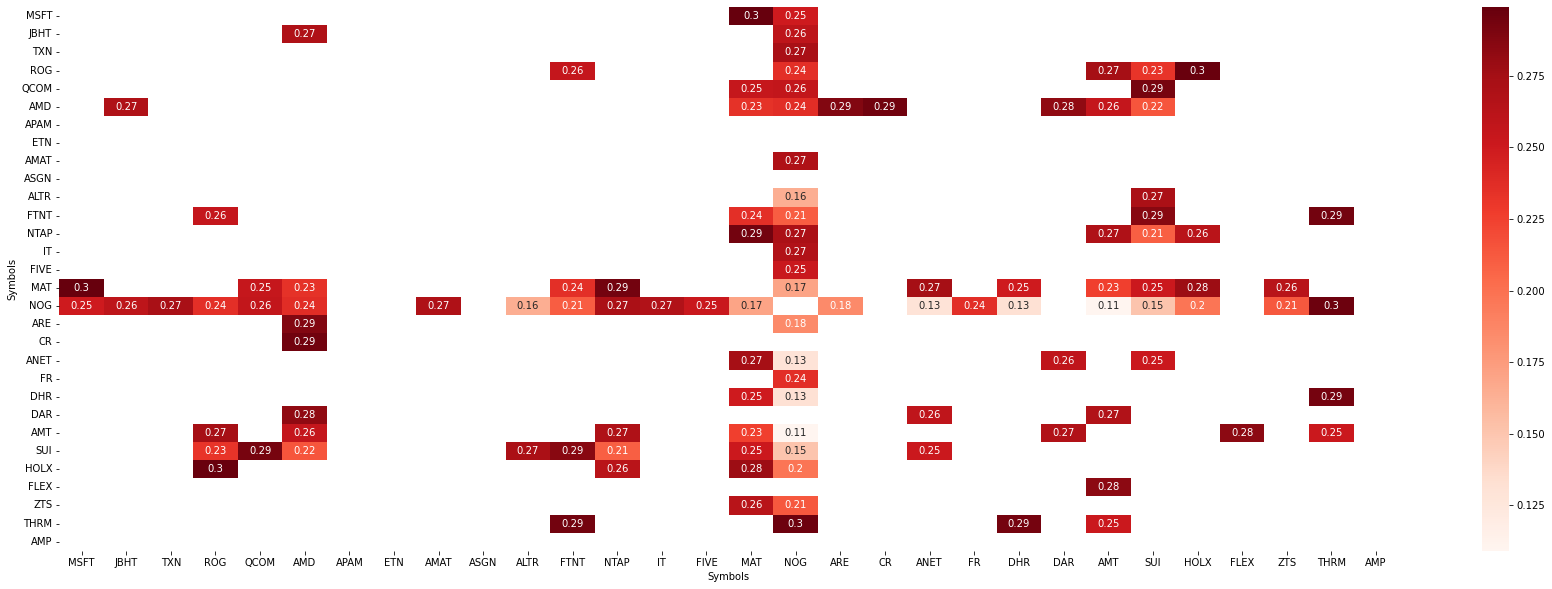

In [22]:
correlation =all_pct_returns_df.corr()
#https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = correlation.where(
    np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values(ascending=False)
print("Strongly positively correlated:\n",sorted_mat.head(),"\n")

print("Weak postiive correlation:\n",sorted_mat.tail())


#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# # Generate correlation maxtrix
# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap="YlGnBu", ax=ax);
# kot = correlation[abs(correlation) >= 0.7]
# plt.figure(figsize=(12,8))
# sns.heatmap(kot, cmap="Greens")


filteredDf = correlation[((correlation >= .7) | (correlation <= -.7)) & (correlation !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Greens")
plt.show()

filteredDf2 = correlation[((correlation <= .3) | (correlation <= -.3)) & (correlation !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf2, annot=True, cmap="Reds")
plt.show()

In [23]:
#add your code here
# volatilitytest = (all_pct_returns_df.std())*np.sqrt(252)
stocks_30_ann_vol = np.sqrt(np.log(all_stocks_price_df/all_stocks_price_df.shift(1)).var())*np.sqrt(252)
print("Volatility (ranked in descending order): \n",stocks_30_ann_vol.sort_values(ascending=False).apply("{0:.2%}".format))
# print("volatilitytest: \n",volatilitytest.apply("{0:.2%}".format))

stocks_30_cum_returns_df = (all_stocks_price_df.pct_change()+ 1).cumprod() - 1
stocks_30_total_returns=stocks_30_cum_returns_df.tail(1)
stocks_30_annualized_returns =(1+stocks_30_total_returns)**(1/5)-1
stocks_30_annualized_returns=stocks_30_annualized_returns.reset_index(drop=True)
stocks_30_annualized_returns=stocks_30_annualized_returns.T
stocks_30_annualized_returns.rename(columns={0 :'Annualised returns'}, inplace=True )
print("\nAnnualized Returns (ranked in descending order): \n",stocks_30_annualized_returns.round(2).sort_values(by="Annualised returns",ascending=False))

Volatility (ranked in descending order): 
 Symbols
NOG     84.30%
AMD     56.16%
FLEX    46.46%
MAT     46.31%
ROG     45.73%
ALTR    45.19%
FIVE    45.07%
ANET    43.60%
AMAT    42.64%
AMP     38.52%
ASGN    38.31%
DAR     38.25%
FTNT    37.87%
QCOM    37.57%
NTAP    37.12%
APAM    36.30%
THRM    36.28%
CR      34.55%
IT      31.89%
TXN     29.97%
HOLX    29.75%
ETN     29.43%
JBHT    28.25%
MSFT    27.51%
SUI     26.99%
AMT     25.83%
FR      25.81%
ZTS     25.02%
ARE     24.53%
DHR     23.27%
dtype: object

Annualized Returns (ranked in descending order): 
          Annualised returns
Symbols                    
AMD                    0.66
FTNT                   0.64
ANET                   0.43
MSFT                   0.42
AMAT                   0.39
DAR                    0.39
FIVE                   0.39
ZTS                    0.36
DHR                    0.34
ALTR                   0.33
ROG                    0.29
QCOM                   0.27
IT                     0.27
SUI          

In [24]:
#assume a risk free rate of 0%. Use 0% to match results with pyfolio
risk_free_ann_ret_rate = 0.0


#find the average daily return value
avg_daily_ret = all_pct_returns_df.mean()

#Now construct a new dataframe with required columns to compute Sharpe ratio
stocks_df = all_pct_returns_df.copy()

stocks_df_excessRet = stocks_df - risk_free_ann_ret_rate/252
# #create/add the risk free rate column in the df
stocks_df['RiskFree_Rate'] = risk_free_ann_ret_rate/252

# #compute the average risk free rate value
avg_rf_ret = stocks_df['RiskFree_Rate'].mean()
stocks_30_sharpe = ((avg_daily_ret - avg_rf_ret)/stocks_df_excessRet.std())*np.sqrt(252)
print("Sharpe Ratio (ranked in descending order): \n",stocks_30_sharpe.sort_values(ascending=False).apply("{0:.2%}".format))

Sharpe Ratio (ranked in descending order): 
 Symbols
FTNT    153.94%
AMD     140.34%
DHR     137.13%
ZTS     135.99%
MSFT    133.54%
DAR     103.34%
QCOM    101.33%
ALTR    100.45%
SUI      93.63%
FIVE     90.94%
FR       89.85%
IT       86.80%
AMT      84.85%
AMAT     81.12%
ANET     80.75%
ETN      80.33%
THRM     80.06%
ARE      77.15%
TXN      74.37%
NTAP     71.33%
JBHT     70.95%
HOLX     69.71%
NOG      68.70%
APAM     64.69%
AMP      64.63%
ASGN     63.11%
ROG      52.94%
MAT      47.02%
CR       36.99%
FLEX     26.04%
dtype: object


In [25]:
tickers = ["EFIV",'NTAP', 'ASGN', 'FTNT', 'AMAT', 'ARE', 'TXN', 'ZTS', 'ANET', 'IT',
       'JBHT', 'SUI', 'MAT', 'AMP', 'ROG', 'ETN', 'THRM', 'AMD', 'CR',
       'AMT', 'QCOM', 'FR', 'ALTR', 'FLEX', 'DAR', 'MSFT', 'HOLX', 'FIVE',
       'APAM', 'NOG', 'DHR']

start_date = '2017-01-01'
end_date = '2021-12-31'

beta_data = data.DataReader(tickers,'yahoo', start_date, end_date)
beta_stocks_price_df = beta_data['Adj Close']

beta_pct_returns_df = beta_stocks_price_df.pct_change().dropna()
covariance=beta_pct_returns_df.cov().iloc[0,1:]
benchmark_variance = beta_pct_returns_df["EFIV"].var()
beta_dic={}
beta_col=[]
beta_val=[]
for col in all_pct_returns_df:
    beta = covariance["{}".format(col)] / benchmark_variance
    beta_col.append(col)
    beta_val.append(beta)
beta_dic["Symbol"]=beta_col
beta_dic["Beta"]=beta_val
beta_df = pd.DataFrame(beta_dic)
beta_df.round(2).sort_values(by="Beta",ascending=False)

,Symbol,Beta
8,AMAT,1.72
5,AMD,1.51
6,APAM,1.51
4,QCOM,1.50
16,NOG,1.41
11,FTNT,1.41
26,FLEX,1.36
10,ALTR,1.30
22,DAR,1.27
0,MSFT,1.26


# Manually adjust weightage to optimise portfolio

In [26]:
#ordering of the 30 stocks 
# ['MSFT', 'JBHT', 'TXN', 'ROG', 'QCOM', 'AMD',
#  'APAM', 'ETN', 'AMAT','ASGN', 'ALTR', 'FTNT',
#  'NTAP', 'IT', 'FIVE', 'MAT', 'NOG', 'ARE',
#  'CR','ANET', 'FR', 'DHR', 'DAR', 'AMT',
#  'SUI','HOLX', 'FLEX', 'ZTS', 'THRM','AMP']

print("Efficent Frontier highest sharpe weights:\n ",mtc_highest_sharpe_weights)
print("\nEfficent Frontier lowest volatility weights:\n ",mtc_lowest_vol_weights)

Efficent Frontier highest sharpe weights:
  [0.06535888 0.0009612  0.01570255 0.02039912 0.04836437 0.0671638
 0.00345104 0.00287457 0.06503835 0.05398033 0.05110865 0.06816761
 0.0160375  0.05608714 0.01636749 0.01695751 0.03342632 0.0448626
 0.01842824 0.03694292 0.0096389  0.06535809 0.0507058  0.06888179
 0.01686317 0.00978493 0.00775008 0.06775906 0.00128569 0.00029231]

Efficent Frontier lowest volatility weights:
  [0.0130003  0.01095348 0.01373909 0.0724461  0.06576276 0.07529274
 0.03202815 0.00856417 0.01195315 0.03368331 0.06670466 0.07034855
 0.06233589 0.06840579 0.0658734  0.00113249 0.07378576 0.01371303
 0.00288573 0.03676421 0.00265162 0.02050295 0.01286548 0.02234716
 0.00333034 0.01738324 0.05935949 0.00248938 0.00510686 0.05459073]


C:\Users\acer\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2017-11-02
End date,2021-12-31
Total months,49
,Backtest
Annual return,41.7%
Cumulative returns,325.5%
Annual volatility,25.1%
Sharpe ratio,1.51
Calmar ratio,1.18
Stability,0.92
Max drawdown,-35.4%


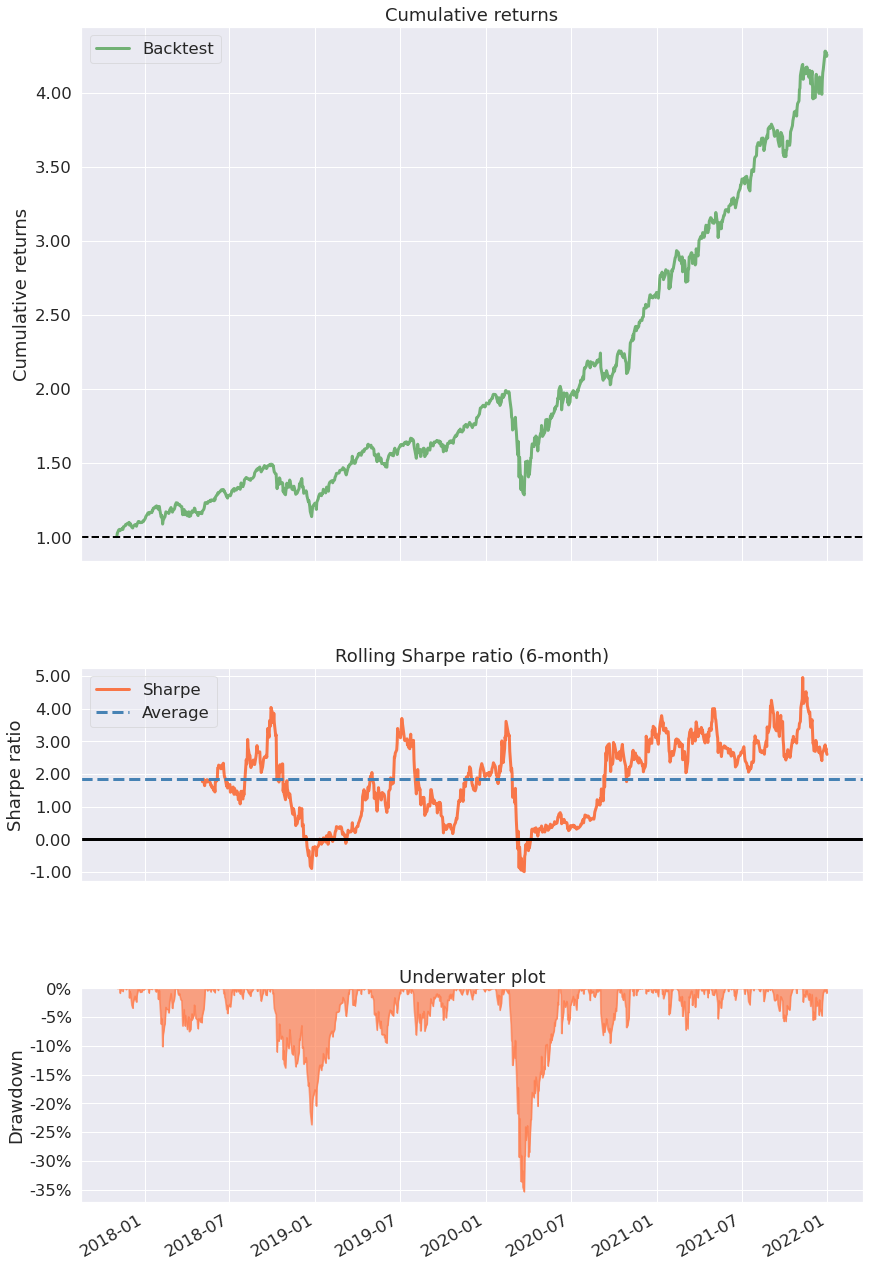

In [27]:
import pyfolio as pf
#portfolio 1
#define portfolio weights

portfolio_weights = mtc_highest_sharpe_weights #this corresponds to order of the columns in the returns df

# # #apply the weights to returns
portfolio_ret_1 = all_pct_returns_df * portfolio_weights

# #add up the different weights column returns into single column
portfolio_returns_1 = portfolio_ret_1.sum(axis = 1)

pf.create_simple_tear_sheet(portfolio_returns_1)


In [28]:
for x, y in zip(df4["Symbol"], portfolio_weights):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

MSFT: 6.54% JBHT: 0.10% TXN: 1.57% ROG: 2.04% QCOM: 4.84% AMD: 6.72% APAM: 0.35% ETN: 0.29% AMAT: 6.50% ASGN: 5.40% ALTR: 5.11% FTNT: 6.82% NTAP: 1.60% IT: 5.61% FIVE: 1.64% MAT: 1.70% NOG: 3.34% ARE: 4.49% CR: 1.84% ANET: 3.69% FR: 0.96% DHR: 6.54% DAR: 5.07% AMT: 6.89% SUI: 1.69% HOLX: 0.98% FLEX: 0.78% ZTS: 6.78% THRM: 0.13% AMP: 0.03% 

Start date,2017-11-02
End date,2021-12-31
Total months,49
,Backtest
Annual return,37.4%
Cumulative returns,275.1%
Annual volatility,23.8%
Sharpe ratio,1.46
Calmar ratio,1.09
Stability,0.92
Max drawdown,-34.5%


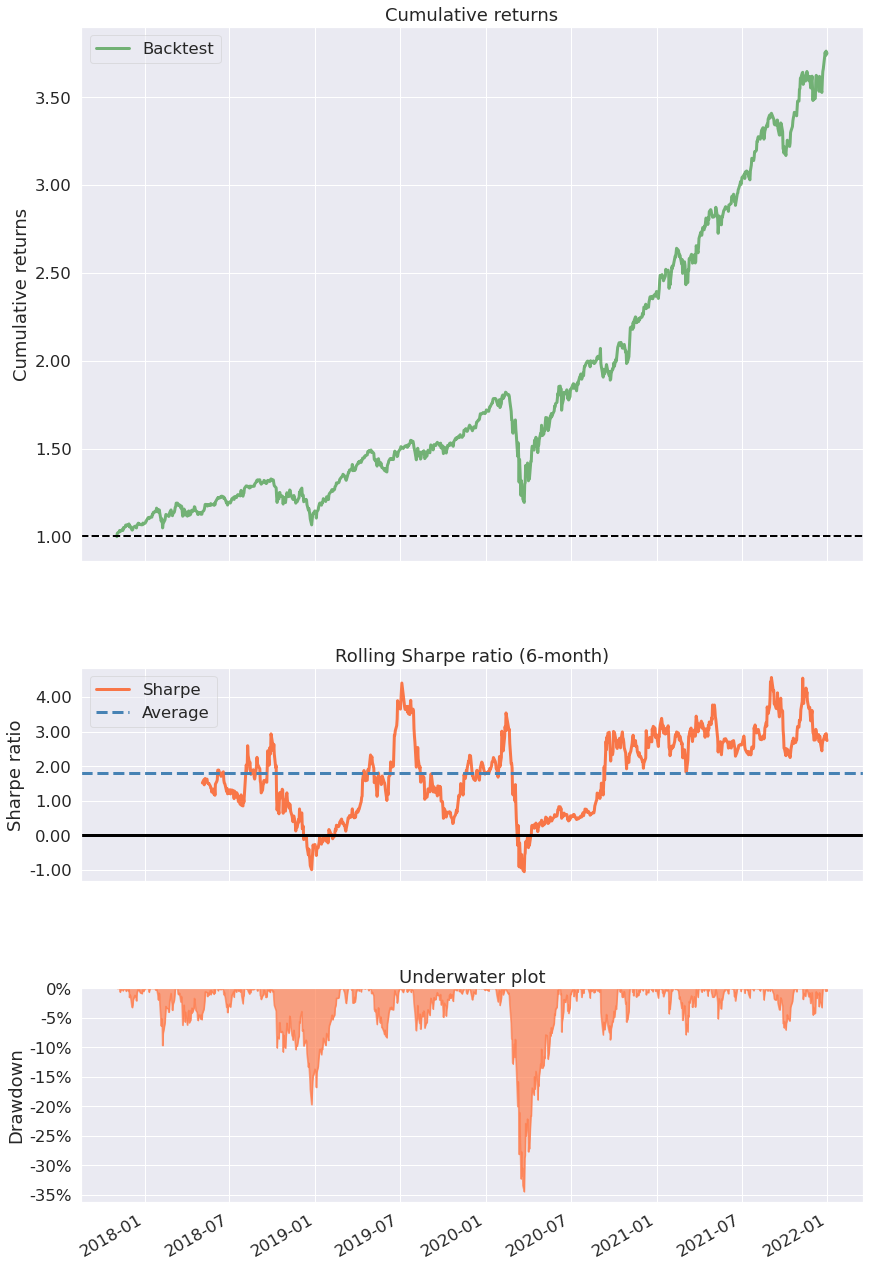

In [29]:

#portfolio 2 

#ordering of the 30 stocks 
# ['MSFT', 'JBHT', 'TXN', 'ROG', 'QCOM', 'AMD',
#  'APAM', 'ETN', 'AMAT','ASGN', 'ALTR', 'FTNT',
#  'NTAP', 'IT', 'FIVE', 'MAT', 'NOG', 'ARE',
#  'CR','ANET', 'FR', 'DHR', 'DAR', 'AMT',
#  'SUI','HOLX', 'FLEX', 'ZTS', 'THRM','AMP']


#define portfolio weights

portfolio_weights2 =   [0.11741431, 0.0009612,  0.01570255, 0.02039912, 0.04836437, 0.0001,
 0.00345104, 0.00287457, 0.06503835, 0.05398033, 0.05110865, 0.06816761,
 0.0160375,  0.05608714, 0.01636749, 0.0001, 0.0001, 0.0448626,
 0.01842824, 0.03694292, 0.0096389,  0.11741352, 0.0507058,  0.06888179,
 0.03, 0.00978493, 0.00775008, 0.06775906, 0.00128569, 0.00029231] #this corresponds to order of the columns in the returns df
sum(portfolio_weights2)
# # #apply the weights to returns
portfolio_ret_2 = all_pct_returns_df * portfolio_weights2

# #add up the different weights column returns into single column
portfolio_returns_2 = portfolio_ret_2.sum(axis = 1)

pf.create_simple_tear_sheet(portfolio_returns_2)

In [30]:
for x, y in zip(df4["Symbol"], portfolio_weights2):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

MSFT: 11.74% JBHT: 0.10% TXN: 1.57% ROG: 2.04% QCOM: 4.84% AMD: 0.01% APAM: 0.35% ETN: 0.29% AMAT: 6.50% ASGN: 5.40% ALTR: 5.11% FTNT: 6.82% NTAP: 1.60% IT: 5.61% FIVE: 1.64% MAT: 0.01% NOG: 0.01% ARE: 4.49% CR: 1.84% ANET: 3.69% FR: 0.96% DHR: 11.74% DAR: 5.07% AMT: 6.89% SUI: 3.00% HOLX: 0.98% FLEX: 0.78% ZTS: 6.78% THRM: 0.13% AMP: 0.03% 

Start date,2017-11-02
End date,2021-12-31
Total months,49
,Backtest
Annual return,38.9%
Cumulative returns,292.7%
Annual volatility,23.9%
Sharpe ratio,1.50
Calmar ratio,1.13
Stability,0.92
Max drawdown,-34.4%


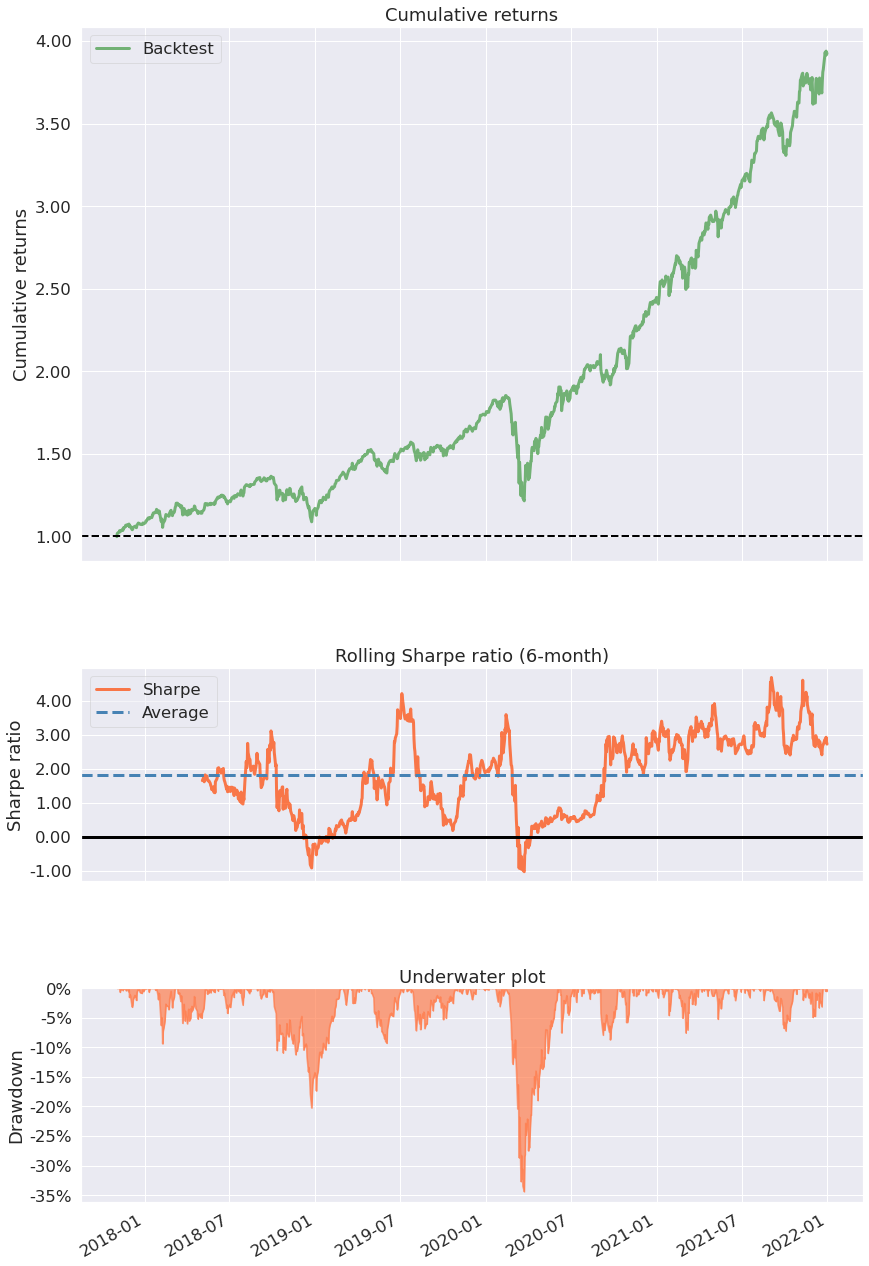

In [31]:
# #portfolio 3

#ordering of the 30 stocks 
# ['MSFT', 'JBHT', 'TXN', 'ROG', 'QCOM', 'AMD',
#  'APAM', 'ETN', 'AMAT','ASGN', 'ALTR', 'FTNT',
#  'NTAP', 'IT', 'FIVE', 'MAT', 'NOG', 'ARE',
#  'CR','ANET', 'FR', 'DHR', 'DAR', 'AMT',
#  'SUI','HOLX', 'FLEX', 'ZTS', 'THRM','AMP']

# more msft, are, dhr, sui
# least nog, amd,mat
# lesser etn, less fr
0.00237457
# #define portfolio weights
portfolio_weights3 = [0.07054218, 0.0009612,  0.01570255, 0.02039912, 0.04836437, 0.0001,
 0.00345104, 0.0005, 0.06503835, 0.05398033, 0.05110865, 0.11741431,
 0.0160375,  0.05608714, 0.01636749, 0.0001, 0.0001, 0.0448626,
 0.01842824, 0.03694292, 0.0096389,  0.11741352, 0.0507058,  0.06888179,
 0.03, 0.00978493, 0.00775008, 0.06775906, 0.00128569, 0.00029231] #this corresponds to order of the columns in the returns df


# # #apply the weights to returns
portfolio_ret_3 = all_pct_returns_df * portfolio_weights3

# #add up the different weights column returns into single column
portfolio_returns_3 = portfolio_ret_3.sum(axis = 1)

pf.create_simple_tear_sheet(portfolio_returns_3)

In [32]:
for x, y in zip(df4["Symbol"], portfolio_weights3):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

MSFT: 7.05% JBHT: 0.10% TXN: 1.57% ROG: 2.04% QCOM: 4.84% AMD: 0.01% APAM: 0.35% ETN: 0.05% AMAT: 6.50% ASGN: 5.40% ALTR: 5.11% FTNT: 11.74% NTAP: 1.60% IT: 5.61% FIVE: 1.64% MAT: 0.01% NOG: 0.01% ARE: 4.49% CR: 1.84% ANET: 3.69% FR: 0.96% DHR: 11.74% DAR: 5.07% AMT: 6.89% SUI: 3.00% HOLX: 0.98% FLEX: 0.78% ZTS: 6.78% THRM: 0.13% AMP: 0.03% 